In [1]:
import azureml.core
from azureml.core import Workspace

ws = Workspace.from_config()

print('Ready to use Azure ML {} to work with {}'.format(azureml.core.VERSION,ws.name))

Ready to use Azure ML 1.37.0 to work with dp100-workspace


starting experiment car_prediction
analyzing 301 rows of data


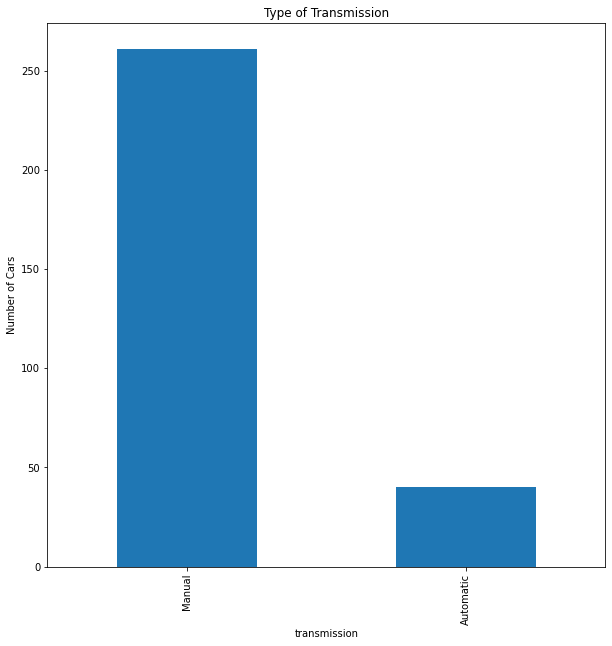

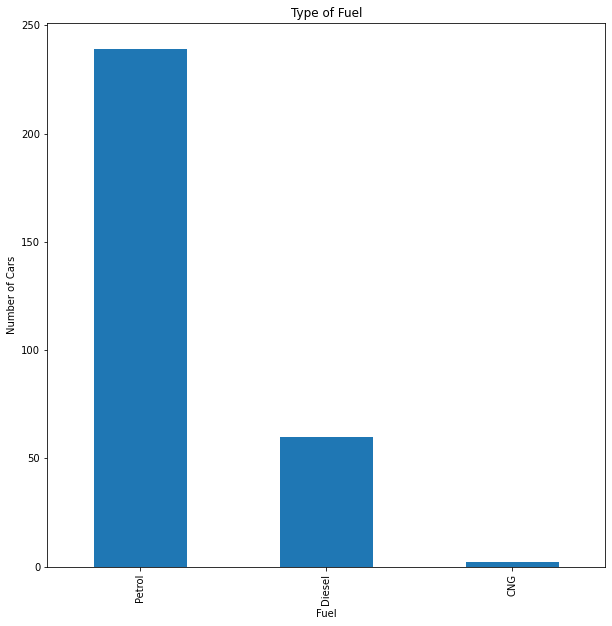

In [2]:
from azureml.core import Experiment
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# creating azure experiment within our workspace
experiment = Experiment(workspace=ws,name="car_prediction")

run = experiment.start_logging()
print('starting experiment',experiment.name)

# loading the dataset

data = pd.read_csv('dp100_practice/car_prediction.csv')

# counting rows and logging result
rows_count = len(data)
run.log('observations',rows_count)
print('analyzing {} rows of data'.format(rows_count))

# Plotting and logging some more information

transmission_type = data['Transmission'].value_counts()
fig1 = plt.figure(figsize=(10,10))
ax=fig1.gca()

transmission_type.plot.bar(ax=ax)
ax.set_title('Type of Transmission')
ax.set_xlabel('transmission')
ax.set_ylabel('Number of Cars')
plt.show()
run.log_image(name='type of transmission',plot=fig1)

fuel_type = data['Fuel_Type'].value_counts()
fig2 = plt.figure(figsize=(10,10))
ax=fig2.gca()

fuel_type.plot.bar(ax=ax)
ax.set_title('Type of Fuel')
ax.set_xlabel('Fuel')
ax.set_ylabel('Number of Cars')
plt.show()
run.log_image(name='Type of Fuel',plot=fig2)

# save a sample of the uploaded data and upload it to experiment ouptut

data.sample(100).to_csv('sample.csv',index=False,header=True)
run.upload_file(name='dp100_practice/output/sample.csv',path_or_stream='./sample.csv')

run.complete()